In [ ]:
import os
import zipfile
 
local_zip = '/content/dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
try:
    %tensorflow_version 2.x
except:
    pass

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from tensorflow import keras
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

from tqdm import tqdm

print("\u2022 Using TensorFlow Version:", tf.__version__)
print("\u2022 Using TensorFlow Hub Version: ", hub.__version__)
print('\u2022 GPU Device Found.' if tf.test.is_gpu_available() else '\u2022 GPU Device Not Found. Running on CPU')

• Using TensorFlow Version: 2.5.0
• Using TensorFlow Hub Version:  0.12.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
• GPU Device Not Found. Running on CPU


In [ ]:
dry_dir = os.path.join('/content/trainskin/dry')
normal_dir = os.path.join('/content/trainskin/normal')
oily_dir = os.path.join('/content/trainskin/oily')
sensitif_dir = os.path.join('/content/trainskin/sensitif')
kombinasi_dir = os.path.join('/content/trainskin/kombinasi')


print('total training dry images:', len(os.listdir(dry_dir)))
print('total training normal images:', len(os.listdir(normal_dir)))
print('total training oily images:', len(os.listdir(oily_dir)))
print('total training sensitif images:', len(os.listdir(sensitif_dir)))
print('total training kombinasi images:', len(os.listdir(kombinasi_dir)))

dry_files = os.listdir(dry_dir)
print(dry_files)

normal_files = os.listdir(normal_dir)
print(normal_files)

oily_files = os.listdir(oily_dir)
print(oily_files)

sensitif_files = os.listdir(sensitif_dir)
print(sensitif_files)

kombinasi_files = os.listdir(kombinasi_dir)
print(kombinasi_files)

total training dry images: 15
total training normal images: 15
total training oily images: 15
total training sensitif images: 15
total training kombinasi images: 15
['dry.11.PNG', 'dry.2.PNG', 'dry.1.PNG', 'dry.14.PNG', 'dry.6.PNG', 'dry.13.PNG', 'dry.5.PNG', 'dry.3.PNG', 'dry.15.PNG', 'dry.8.PNG', 'dry.9.PNG', 'dry.10.PNG', 'dry.7.PNG', 'dry.12.PNG', 'dry.4.PNG']
['normal.9.PNG', 'normal.4.PNG', 'normal.5.PNG', 'normal.3.PNG', 'normal.13.PNG', 'normal.15.PNG', 'normal.2.PNG', 'normal.11.PNG', 'normal.6.PNG', 'normal.8.PNG', 'normal.1.PNG', 'normal.7.PNG', 'normal.10.PNG', 'normal.12.PNG', 'normal.14.PNG']
['oily.6.PNG', 'oily.7.PNG', 'oily.5.PNG', 'oily.4.PNG', 'oily.8.PNG', 'oily.10.PNG', 'oily.13.PNG', 'oily.15.PNG', 'oily.1.PNG', 'oily.3.PNG', 'oily.12.PNG', 'oily.14.PNG', 'oily.2.PNG', 'oily.11.PNG', 'oily.9.PNG']
['sensitif.16.PNG', 'sensitif.6.PNG', 'sensitif.7.PNG', 'sensitif.18.PNG', 'sensitif.5.PNG', 'sensitif.14.PNG', 'sensitif.9.PNG', 'sensitif.8.PNG', 'sensitif.10.PNG', 's

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.8) and (logs.get('val_accuracy')>=0.8):
      print("\nReached 80% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
TRAINING_DIR = "/content/trainskin/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/testskin/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=5
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=5
)

Found 75 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [ ]:
image_size = 150
IMG_SHAPE = (image_size, image_size, 3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
model = tf.keras.Sequential([
                          base_model,
                          keras.layers.GlobalAveragePooling2D(),
                          keras.layers.Dense(5, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=300, validation_data = validation_generator, verbose = 2, validation_steps=2,callbacks=[callbacks])

Epoch 1/300
15/15 - 5s - loss: 0.1041 - accuracy: 0.9867 - val_loss: 1.2834 - val_accuracy: 0.5000
Epoch 2/300
15/15 - 2s - loss: 0.1199 - accuracy: 0.9733 - val_loss: 1.8793 - val_accuracy: 0.3000
Epoch 3/300
15/15 - 2s - loss: 0.2453 - accuracy: 0.9333 - val_loss: 2.1657 - val_accuracy: 0.4000
Epoch 4/300
15/15 - 2s - loss: 0.1731 - accuracy: 0.9200 - val_loss: 2.1630 - val_accuracy: 0.6000
Epoch 5/300
15/15 - 2s - loss: 0.1387 - accuracy: 0.9600 - val_loss: 1.8854 - val_accuracy: 0.5000
Epoch 6/300
15/15 - 2s - loss: 0.1679 - accuracy: 0.9733 - val_loss: 2.2658 - val_accuracy: 0.4000
Epoch 7/300
15/15 - 2s - loss: 0.1712 - accuracy: 0.9333 - val_loss: 1.5096 - val_accuracy: 0.7000
Epoch 8/300
15/15 - 2s - loss: 0.2009 - accuracy: 0.9200 - val_loss: 3.3160 - val_accuracy: 0.2000
Epoch 9/300
15/15 - 2s - loss: 0.1387 - accuracy: 0.9733 - val_loss: 2.2699 - val_accuracy: 0.3000
Epoch 10/300
15/15 - 2s - loss: 0.2929 - accuracy: 0.8933 - val_loss: 1.9106 - val_accuracy: 0.4000
Epoch 11/

In [ ]:
model.save("skincaremobilenet.h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
import pathlib
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.


INFO:tensorflow:Assets written to: saved_model/1/assets


INFO:tensorflow:Assets written to: saved_model/1/assets


8895992

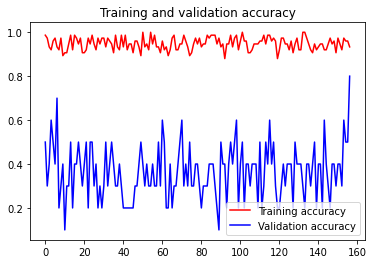

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

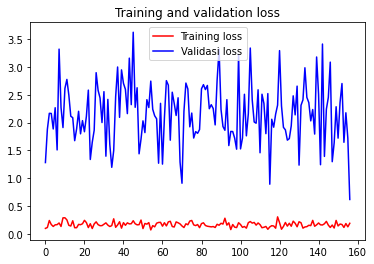

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validasi loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes.argmax())
  print(fn)
  print(classes)

Saving sensitif.2.jpg to sensitif.2.jpg
Saving sensitif.3.jpg to sensitif.3.jpg
Saving sensitif.4.PNG to sensitif.4.PNG
Saving sensitif.12.PNG to sensitif.12.PNG
Saving sensitif.17.png to sensitif.17.png
4
sensitif.2.jpg
[[0.01363377 0.00453884 0.01142485 0.00925572 0.96114683]]
2
sensitif.3.jpg
[[0.18962984 0.09230828 0.46013996 0.10731526 0.15060672]]
3
sensitif.4.PNG
[[0.114037   0.02220902 0.00905287 0.5151559  0.33954525]]
4
sensitif.12.PNG
[[0.08682684 0.04669879 0.03157923 0.18094301 0.6539521 ]]
0
sensitif.17.png
[[0.54624057 0.08121831 0.01103842 0.08312148 0.2783813 ]]
